<br>

# The numpy.random package

### Author: Silvio Dunst
***

### What is the purpose of the numpy.random package
The "numpy.random" package creates random numbers. Random means it creates numbers what can not be predicted. But it doesn't mean the numbers are unique. The same number can be created several times. The "numpy.random" package creates Pseudo random numbers. The numbers will be generated by a computer algorithm so they are not really random. The algorithm uses a combination of a BitGenerator and a Generator[1]. The Bitgenerator creates sequences of random numbers as unsigned integer words with a length of 32 or 64 bits. The Generator uses those sequences to sample from different statistical distributions like normal, uniform and binomial distribution to generate the random numbers. The Bitgenerator uses as default the "PCG64" Generator. To initialize the Bitgenerator it uses a seed.
#### What is a seed?
Usually the seed is the time on the computer in microsecond then the "numpy.random" function is activated. The seed can be also activated by a keystroke, mouse movement or data on the network. The role of the seed is to start the Bitgenerator to start the "numpy.random" process. The new PCG64 seed generator outperformance the older Mersenne Twister generator. The PCG64 generator is twice as fast as the Mersenne Twister generator, is more secure and uses less memory only 16 byte instead of 2.5 kilobyte for a seed[2]. The generators will be used in simple random data, permutations and distribution functions to generate random numbers. 
#### Creating the same  numbers all the time
To testing code and algorithms it is useful to generate the same numbers all the time. The package "numpy.random" has a class called "Generator" where the same numbers can be produced[3],[4].
Import the Generator class as well as the PCG64 or MT19937(Mersenne Twister)class. It is better to use the PCG64 class as descripted above. The numbers can be changed by changing the integer number in the brackets(1234). In the next line the BitGenerator generates the same numbers in the PCG64 class when the seed is activated. The numbers will be passed on to the Generator. The Generator uses the uniform distribution to generate the 10 numbers from 0 to 9 as float numbers.
```python
from numpy.random import Generator, PCG64
rg = Generator(PCG64(1234))# use the PCG64 class MT19937 (Mersenne Twister)class could be used as well
x = rg.uniform(0,10,10)# uses the uniform distribution other distribution can be used as well
x
```

In [40]:
from numpy.random import Generator, PCG64

rg = Generator(PCG64(1234))
x = rg.uniform(0,10,10)
x

array([9.76699767, 3.80195735, 9.23246234, 2.61692424, 3.19097058,
       1.18091233, 2.41766293, 3.18533929, 9.64079245, 2.63649804])

#### Here is a method where random numbers can be generated
```python
from numpy.random import Generator, PCG64, SeedSequence
sg = SeedSequence(1234)
rg = [Generator(PCG64(s))
for s in sg.spawn(10)]
rg
```

In [35]:
from numpy.random import Generator, PCG64, SeedSequence
sg = SeedSequence(1234)
rg = [Generator(PCG64(s))
for s in sg.spawn(10)]
#s = int(rg,0)
#rg = s
rg

[Generator(PCG64) at 0x89C3220,
 Generator(PCG64) at 0x89C3310,
 Generator(PCG64) at 0x89C3400,
 Generator(PCG64) at 0x89C34F0,
 Generator(PCG64) at 0x89C35E0,
 Generator(PCG64) at 0x89C36D0,
 Generator(PCG64) at 0x89C37C0,
 Generator(PCG64) at 0x89C38B0,
 Generator(PCG64) at 0x89C39A0,
 Generator(PCG64) at 0x89C3A90]

###  Simple random data Function
The “numpy.random” package uses different distribution and functions to create random data samples. The older versions like 1.15 uses (rand, randn, randint, random_integers, random_sample, random, ranf, sample, choice and bytes) functions. The new version 1.19 has only four functions (integers, random, choice and byte). The new integer version for instance **numpy.random.Generator.integers()** replaces the older integer functions “numpy.random.rand()”, “numpy.random.randn()”, “numpy.random.randint()” and “numpy.random.random_integers()”. The "Generator.integer()" function returns integers from the “discrete uniform” distribution. The new random function **numpy.random.Generator.random()** replaces the “numpy.random.random_sample()”, “numpy.random.random()”, “numpy.random.randf()” and the “numpy.random.sample()” from the older versions. The “continuous uniform” distribution is used for the “Generator.random” function. The function returns a float in a half open interval between 0.0 and 1.0. The **numpy.random.Generator.choice()** function will be used in the new “numpy.random” version 1.19 and replace the old "numpy.random.choice()" version what is generating random samples from a given 1-dimensional array.  The elements in the array can be a string, number, a range, a list or a tuple. The choice function returns a randomly selected element from the specified array. In the new version the shuffle method can be used. The choice function uses the uniform distribution. The **numpy.random.Generator.bytes()** function will be used in the new “numpy.random” version 1.19 and the old "numpy.random.bytes()" versions. It is generating random number of bytes as a string value. In the brackets() from the function you can insert the length of the return string or the amount of bytes are generated in the string.

In [36]:
# Older Version
import numpy as np
np.random.rand(3,2)

array([[0.72087142, 0.97834518],
       [0.44256642, 0.57406798],
       [0.01523975, 0.02997038]])

In [37]:
# New Version 1.19
import numpy as np
rng = np.random.default_rng()
rng.random((3,2))


array([[0.73065481, 0.10201067],
       [0.95455759, 0.65709072],
       [0.49766331, 0.21163342]])

### Permutations Function
Permutation is an arrangement of all the data or part of the data in a dataset. For example, suppose we have a set of three letters: A, B, and C. We might ask how many ways we can arrange 2 letters from that set. Each possible arrangement would be an example of a permutation. The complete list of possible permutations would be: AB, AC, BA, BC, CA, and CB. When they refer to permutations, statisticians use a specific terminology. They describe permutations as n distinct objects taken r at a time. Translation: n refers to the number of objects from which the permutation is formed; and r refers to the number of objects used to form the permutation. Consider the example from the previous paragraph. The permutation was formed from 3 letters (A, B, and C), so n = 3; and the permutation consisted of 2 letters, so r = 2[5].**Computing the number of permutations.** The number of permutations of n objects taken r at a time is

$$ nPr = n(n - 1)(n - 2) ... (n - r + 1) = n! / (n - r)! $$

Note the distinction between a permutation and a  combination . A combination focuses on the selection of objects without regard to the order in which they are selected. A permutation, in contrast, focuses on the arrangement of objects with regard to the order in which they are arranged. Thus, the letters AB and BA represent two different permutations, because the order is different. However, they represent only 1 combination; because order is not important in a combination. 

The permutation() method in the “numpy.random” function returns a re-arranged array and leaves the original array un-changed.



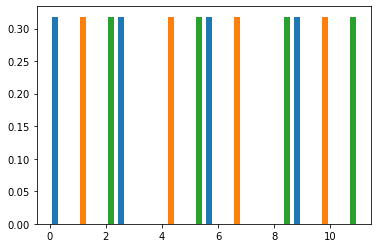

In [38]:
# found this code on "https://www.geeksforgeeks.org/numpy-random-permutation-in-python/" websiteb
# import numpy 
import numpy as np 
import matplotlib.pyplot as plt 
  
arr = np.arange(12).reshape((4, 3)) 
# Using permutation() method 
gfg = np.random.permutation(arr) 

count, bins, ignored = plt.hist(gfg, 14, density = True) 
plt.show()


### Shuffle Function
Shuffle is a part of a permutation "numpy.random" function. With the shuffle function the order of the elements in an array will be randomly re arranged.

In [39]:
# createa an array of 10 elements form 0 to 19 in steps of 2
arr = np.arange(0,20,2)
arr


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [33]:
# re arange the order of the elements in the array
np.random.shuffle(arr)
arr

array([ 8, 16,  6,  4, 12, 10,  0,  2, 14, 18])

***

## Distributions
The distribution of a data set is a listing or function showing all the possible values or intervals of the data and how often they occur. When a distribution of numerical data is organized, they are often in an order from the smallest to the largest and broken into reasonable sized groups. They are often put in to graphs and chart like a histogram. The “numpy.random” package has 35 different distributions available. Some of the distributions will be examined below.
***

### Normal distribution
One of the most well known is the “normal” or sometimes called “bell shape curve” distribution. The function “numpy.random” uses the Gaussian distribution. The majority of the numerical values around 60% lie centered around the mean. You get the middle part of the “bell”. When the numerical values move farther out on both side of the mean you find less values. The fewer values represent the downward slope on each side of the “bell”. The “normal” distribution is often found in nature. An example would be the height of a population. Most of the people in a population are average height, some poeple are smaller and some taller. The amounts of smaller and taller people are equal. Only few people are extremely smaller or extremely taller. 

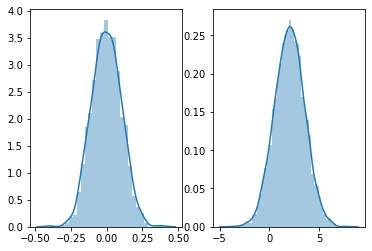

In [25]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1) 
mu, sigma, samplesize = 0, 0.1, 1000 # mean (mu) and standard deviation (sigma) samplesize
s = np.random.normal(mu, sigma, samplesize)
sns.distplot(s);

plt.subplot(1,2,2) 
mu, sigma, samplesize = 2, 1.5, 10000 # mean (mu) and standard deviation (sigma) samplesize
s = np.random.normal(mu, sigma, samplesize)
sns.distplot(s);

#### Explanation of the graph
On the left plot I use a mean(mu) of 0. The average or mean(mu) of the random numpy values around 0. The standard deviation (sigma) is 0.1. I use 1000 samples. The bins in the histogram represent the amount of random numbers in a certain group.
On the right plot the mean(mu) is 2. The values on the x axis are shifted by 2 units in comparison to the left plot. By increasing the standard deviation (sigma) to 1.5 the plot becomes wider. When the sample size is increased to 10000 samples the plot becomes smoother. It is very close to the kde (kernel density)line.
***

### Uniform distribution
One of the simplest distribution in statistics is the “Uniform distribution”.  In the “Uniform distribution” all the outcomes are likely equal. An example would be a deck of cards we have an the same amount of heart, club, diamond and spate. The chances to draw heart, club, diamond or spate are likely equal. Another example is the toss of the coin. The chances to fall on the coins head or tail are likely equal as well.

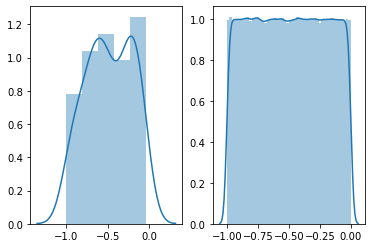

In [24]:
# numpy.random.uniform(low=0.0, high=1.0, size=None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1) 
low, high, size = -1, 0, 100 # low number value, high number value, size (sample size)
s = np.random.uniform(low,high,size)
sns.distplot(s);

plt.subplot(1,2,2) 
low, high, size = -1, 0, 1000000
# low number value, high number value, size (sample size)
s = np.random.uniform(low,high,size)
sns.distplot(s);

#### Explanation of the graph
In the "numpy.random.uniform" distribution we have as an argument or input three variables. The first variable is the low variable from where the random numbers start to generate. The second variable is the high variable. The high variable is where the random generated numbers ends. But the value of the high variable is **not include** in the random generated numbers. The third variable is the size variable. The size variable (sample size) tells the random generator how many numbers will be generated between the low (start) and high (end) value. The greater the size (sample size) the more the random numbers are spread or distributed between the low and high value evenly.

In the second histogram you can see the values of the bins are more equal spread because of the higher size (sample size).
***

### Binomial distribution
One of the well-known random variable is the binomial. The “binomial distribution” is associated with situations what can have two outcomes. The outcomes can be True or False, success or failure, yes or no. A random variable is binomial when the following four conditions are met. 
1. There are a certain or fixed numbers of trials (n)
2. Each trail can have only two outcomes True or False, success or failure, yes or no
3. The probability(p) of success for each trial is the same
4. The trials have to be independent, it means the outcome of one trial doesn’t influence that of any other

Let a variable s the total amount of success in a trail(n). If all the four conditions are met the variable s has a binominal distribution with probability of success on each trail equal to p. The lowercase letter p stands for the probability of getting success on one single trial. A typical example is to toss a coin 10 times in a trail(n). Count the numbers of times the coin lands on his head (success(s)). What is the probability for each trail(n)? The probability(p) for each trail(n) that the coin is landing on his head is 50%. The probability(p) is 0.5.

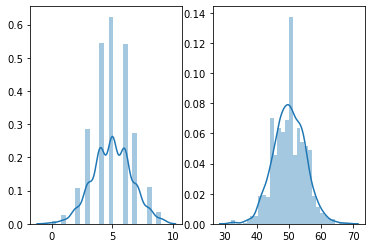

In [23]:
# numpy.random.binomial(n, p, size=None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
n, p = 10, .5  # n = number of trials, p = probability of each trial
s = np.random.binomial(n, p, 1000)
sns.distplot(s);

plt.subplot(1,2,2)
n, p = 100, .5  # n = number of trials, p = probability of each trial
s = np.random.binomial(n, p, 1000)
sns.distplot(s);

#### Explanation of the graph
The "numpy.random.binomial" distribution has two arguments or inputs. The first variable is the amount of trails(n)and the second variable is the probability (p)of success for each trail. In the second chart it is to see when the number of trials increases and the probability (p) of success stays the same (50% or 0.5), the kde (kernel density)  graph becomes smoother and the distribution in general equals more like a bell shape form for the same sample size.
***

### Exponential distribution
The exponential distribution is a continuous probability distribution used to model the time we need to wait before a given event occurs like success or failure or the time laps between two events. The exponential distribution is often used to model the longevity of an electrical or mechanical device or the amount of waiting time until the next train arrives etc..

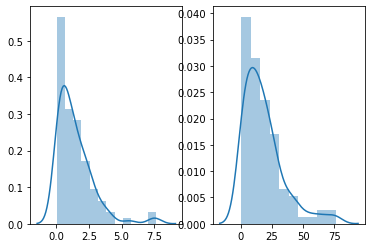

In [22]:
# numpy.random.exponential(scale = 1.0, size=None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
scale = 1.5
size = 100
s = np.random.exponential(scale,size)
sns.distplot(s);


plt.subplot(1,2,2)
scale = 15.0
size = 100
s = np.random.exponential(scale,size)
sns.distplot(s);

#### Explanation of the graph
The "numpy.random.exponential" distribution has two arguments or inputs. The first variable is the scale. The larger the scale parameter is the more spread out is the distribution. In our case the scale in the second plot is 10 times higher when in the first plot. The distribution spread on the bottom on the x axis is approximately 10 times higher as well. The shorter the scale is the distribution kde (kernel density) line becomes is steeper. The second input is the size or sample size. The higher the sample size is the better the result or predictions.
***

###  Triangular distribution
A triangular distribution is a continuous probability distribution with a probability shaped like a triangle. The triangular distribution has in general three values a minimum value, a maximum value and a peak value. In the “numpy.random.triangular” distribution we have as inputs a left (minimum value), a mode (peak  value of the triangle), a right (maximum value) and a size value for the sample size. The higher the size (sample size) the smoother is the triangle shape of the distribution. With the triangular distribution it is possible to estimate the maximum and minimum values and the most likely outcome of a situation even if the mean or standard deviation is not known. The sum of two rolled dices is often modelled as a triangular distribution with a minimum value of 2 a maximum value of 12 and the peak value is around 7. The triangular distribution can be used for forecasting 
weekly sales. 

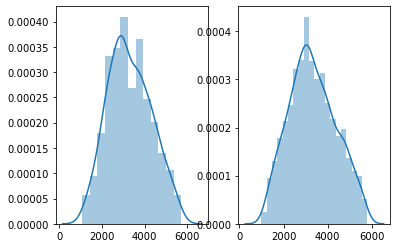

In [35]:
# numpy.random.triangular(left, mode, right, size=None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
h = np.random.triangular(1000, 3000, 6000, 500)
sns.distplot(h);

plt.subplot(1,2,2)
h = np.random.triangular(1000, 3000, 6000, 2000)
sns.distplot(h);


#### Explanation of the graph
The " numpy.random.triangular " distribution has four arguments or inputs (left, mode, right and size). The first variable the “left” variable is the starting point of the triangle. The second variable the “mode” variable is the peak of the triangle. The third variable the“right” variable is end point of the variable. The fourth variable the “size” variable is the sample size of the distribution. The more samples we have the distribution becomes smoother. You can see it in the kde(kernel density) graph in the second plot. An example would weekly sales. The weekly minimum sales could be €1000 and the maximum sales could be around €6000. The most likely weekly sales are around €3000. The probability density function reaches is maximum of 0.0004 at €3000 sales.
***

<br>

## Reference
[1] https://numpy.org/doc/stable/reference/random/index.html

[2] https://webcache.googleusercontent.com/search?q=cache:ZApDvfQiw8IJ:https://indico.scc.kit.edu/event/667/contributions/7182/attachments/3470/5090/dembinski_rng.html+&cd=6&hl=en&ct=clnk&gl=ie

[3] https://stackoverflow.com/questions/62309424/does-numpy-random-seed-always-give-the-same-random-number-every-time

[4] https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng

[5] https://stattrek.com/statistics/dictionary.aspx?definition=permutation

[6] Book "Statistic for Dummies"
***

<br>

## End
***